<img style="float: left; margin: 30px 15px 15px 15px;" src="https://oci02.img.iteso.mx/Identidades-De-Instancia/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg" width="400" height="600" /> 
    
    
## <font color='navy'> PROYECTO 01 REGRESIONES
    
### <font color='navy'> Laboratorio de Aprendizaje Estadistico

    Guillermo Casillas Copca
    Francisco Josué Ramirez Avila
    Juan Alvaro Morales Ramirez Valadez
    

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

<div style="background-color: #cce5ff; padding: 15px; border-radius: 8px;">
  <h3> Objetivo</h3>
</div>


#### Generales
- Desarrollar, comparar y validar un marco de modelos de regresión lineal para explicar y predecir la calidad del vino a partir de sus características químicas, identificar y cuantificar los determinantes clave.
#### Específicos
- EDA: observar la información, describir distribución de variables, detectar outliers y revisar correlaciones.
- Definición de features: Proponer interacciones jutificadas e incrementar orden de factores si es necesario. 
- Modelado: Estimar OLS(sin penalización), Ridge, Lasso y ElasticNet para los 3 modelos y comparar.
- Significancia de factores: interpretar coeficientes, analizar qué variables e interacciones son más influyentes en quality.
- Conclusiones: Responder a la pregunta central de la investigación; ¿Que componentes determinan la calidad del vino?.

<div style="background-color: #cce5ff; padding: 15px; border-radius: 8px;">
  <h3> Marco Teórico</h3>
</div>


**Regresión lineal múltiple**

La regresión lineal múltiple es un modelo que relaciona una variable dependiente (en este caso, la calidad del vino) con varias variables explicativas al mismo tiempo. Permite estimar cómo cambia la calidad al modificar cada característica química, controlando por las demás.

En este trabajo usamos dos variantes:

- Modelo 1: Incluye todas las variables químicas disponibles, evaluado con un esquema train/test split, lo que permite medir el desempeño en datos no vistos.

- Modelo 2: Modelo de Regresión Polinomial de grado 2, utilizando las variablas mas correlacionadas con la calidad. V
  
- Modelo 3: Considera únicamente las variables más correlacionadas con la calidad, reduciendo complejidad y posible multicolinealidad. La validación se hace con K-Folds, lo que ayuda a obtener una evaluación más estable y confiable del modelo.

**Regresión polinomial**

La regresión polinomial es una extensión de la regresión lineal que permite capturar relaciones no lineales, agregando potencias y combinaciones de las variables. Esto ayuda cuando los datos sugieren que la relación no es una recta simple.

En este proyecto usaremos un modelo de grado 2 con las variables más correlacionadas con la calidad. La validación se realizó con Leave-One-Out Cross Validation (LOOCV), una técnica que entrena el modelo con todos los datos menos uno y repite el proceso para cada observación. Esto da una estimación muy honesta del desempeño del modelo.

**Interacción de factores**

La interacción de factores ocurre cuando el efecto de una variable sobre la calidad depende del nivel de otra. En términos prácticos, significa que las características químicas del vino no siempre influyen de manera aislada, sino que pueden reforzarse o contrarrestarse entre sí.

En este proyecto, las interacciones se consideran de manera exploratoria para evaluar si combinaciones de variables aportan una explicación más completa de la calidad. Por ejemplo:

- alcohol × sulfatos: el impacto del alcohol en la calidad puede variar según la concentración de sulfatos.

Las interacciones se incluyen únicamente cuando tienen sentido enológico y mejoran el desempeño del modelo en validación.

**Significancia de factores**

La significancia de los factores se interpreta a partir de los coeficientes estimados. Un valor significativo indica que una variable química tiene una influencia estadísticamente confiable sobre la calidad del vino.

- Además de la significancia, también importa el tamaño del efecto y su impacto en el error de predicción.

- En este trabajo se evalúa cuáles son los determinantes clave (ej. alcohol, acidez, sulfatos) que más influyen en la percepción de calidad.

**Regularización (Ridge, Lasso, Elastic Net)**

Las penalizaciones sirven para evitar sobreajuste y manejar colinealidad entre variables químicas.

- Ridge (L2): encoge coeficientes, no elimina variables; da estabilidad.

- Lasso (L1): puede dejar coeficientes en cero → selección de variables.

- Elastic Net: mezcla L1+L2; útil cuando hay predictores correlacionados.

**Tema elegido para el proyecto**

El proyecto se centra en predecir y explicar la calidad del vino (tinto y blanco) en función de sus componentes fisicoquímicos. Para esto se emplea el Wine Quality Dataset (UCI Machine Learning Repository), que combina variables químicas medidas en laboratorio con evaluaciones de calidad realizadas por catadores.

El objetivo práctico es identificar qué características químicas son más determinantes en la calidad y comparar el desempeño de los tres modelos de regresión con distintos enfoques de validación (train/test, LOOCV y K-Folds).

<div style="background-color: #cce5ff; padding: 15px; border-radius: 8px;">
  <h3> Análisis de Dataset</h3>
</div>


In [17]:
colnames = [ "fixed acidity", "volatile acidity", "citric acid",
             "residual sugar", "chlorides", "free sulfur dioxide",
             "total sulfur dioxide", "density", "pH", "sulphates",
             "alcohol", "quality" ]
data_red = pd.read_csv("winequality-red.csv", sep=";", names=colnames, header=0)
data_red["Red"] = 1
data_red["White"] = 0

data_white = pd.read_csv("winequality-white.csv", sep=";", names=colnames, header=0)
data_white["Red"] = 0
data_white["White"] = 1

data = pd.concat([data_red, data_white], ignore_index=True)

In [19]:
data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Red,White
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0


In [21]:
data.shape

(6497, 14)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  Red                   6497 non-null   int64  
 13  White                 6497 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 710.7 KB


In [24]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Red,White
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000,1.000000


<Figure size 2000x2500 with 0 Axes>

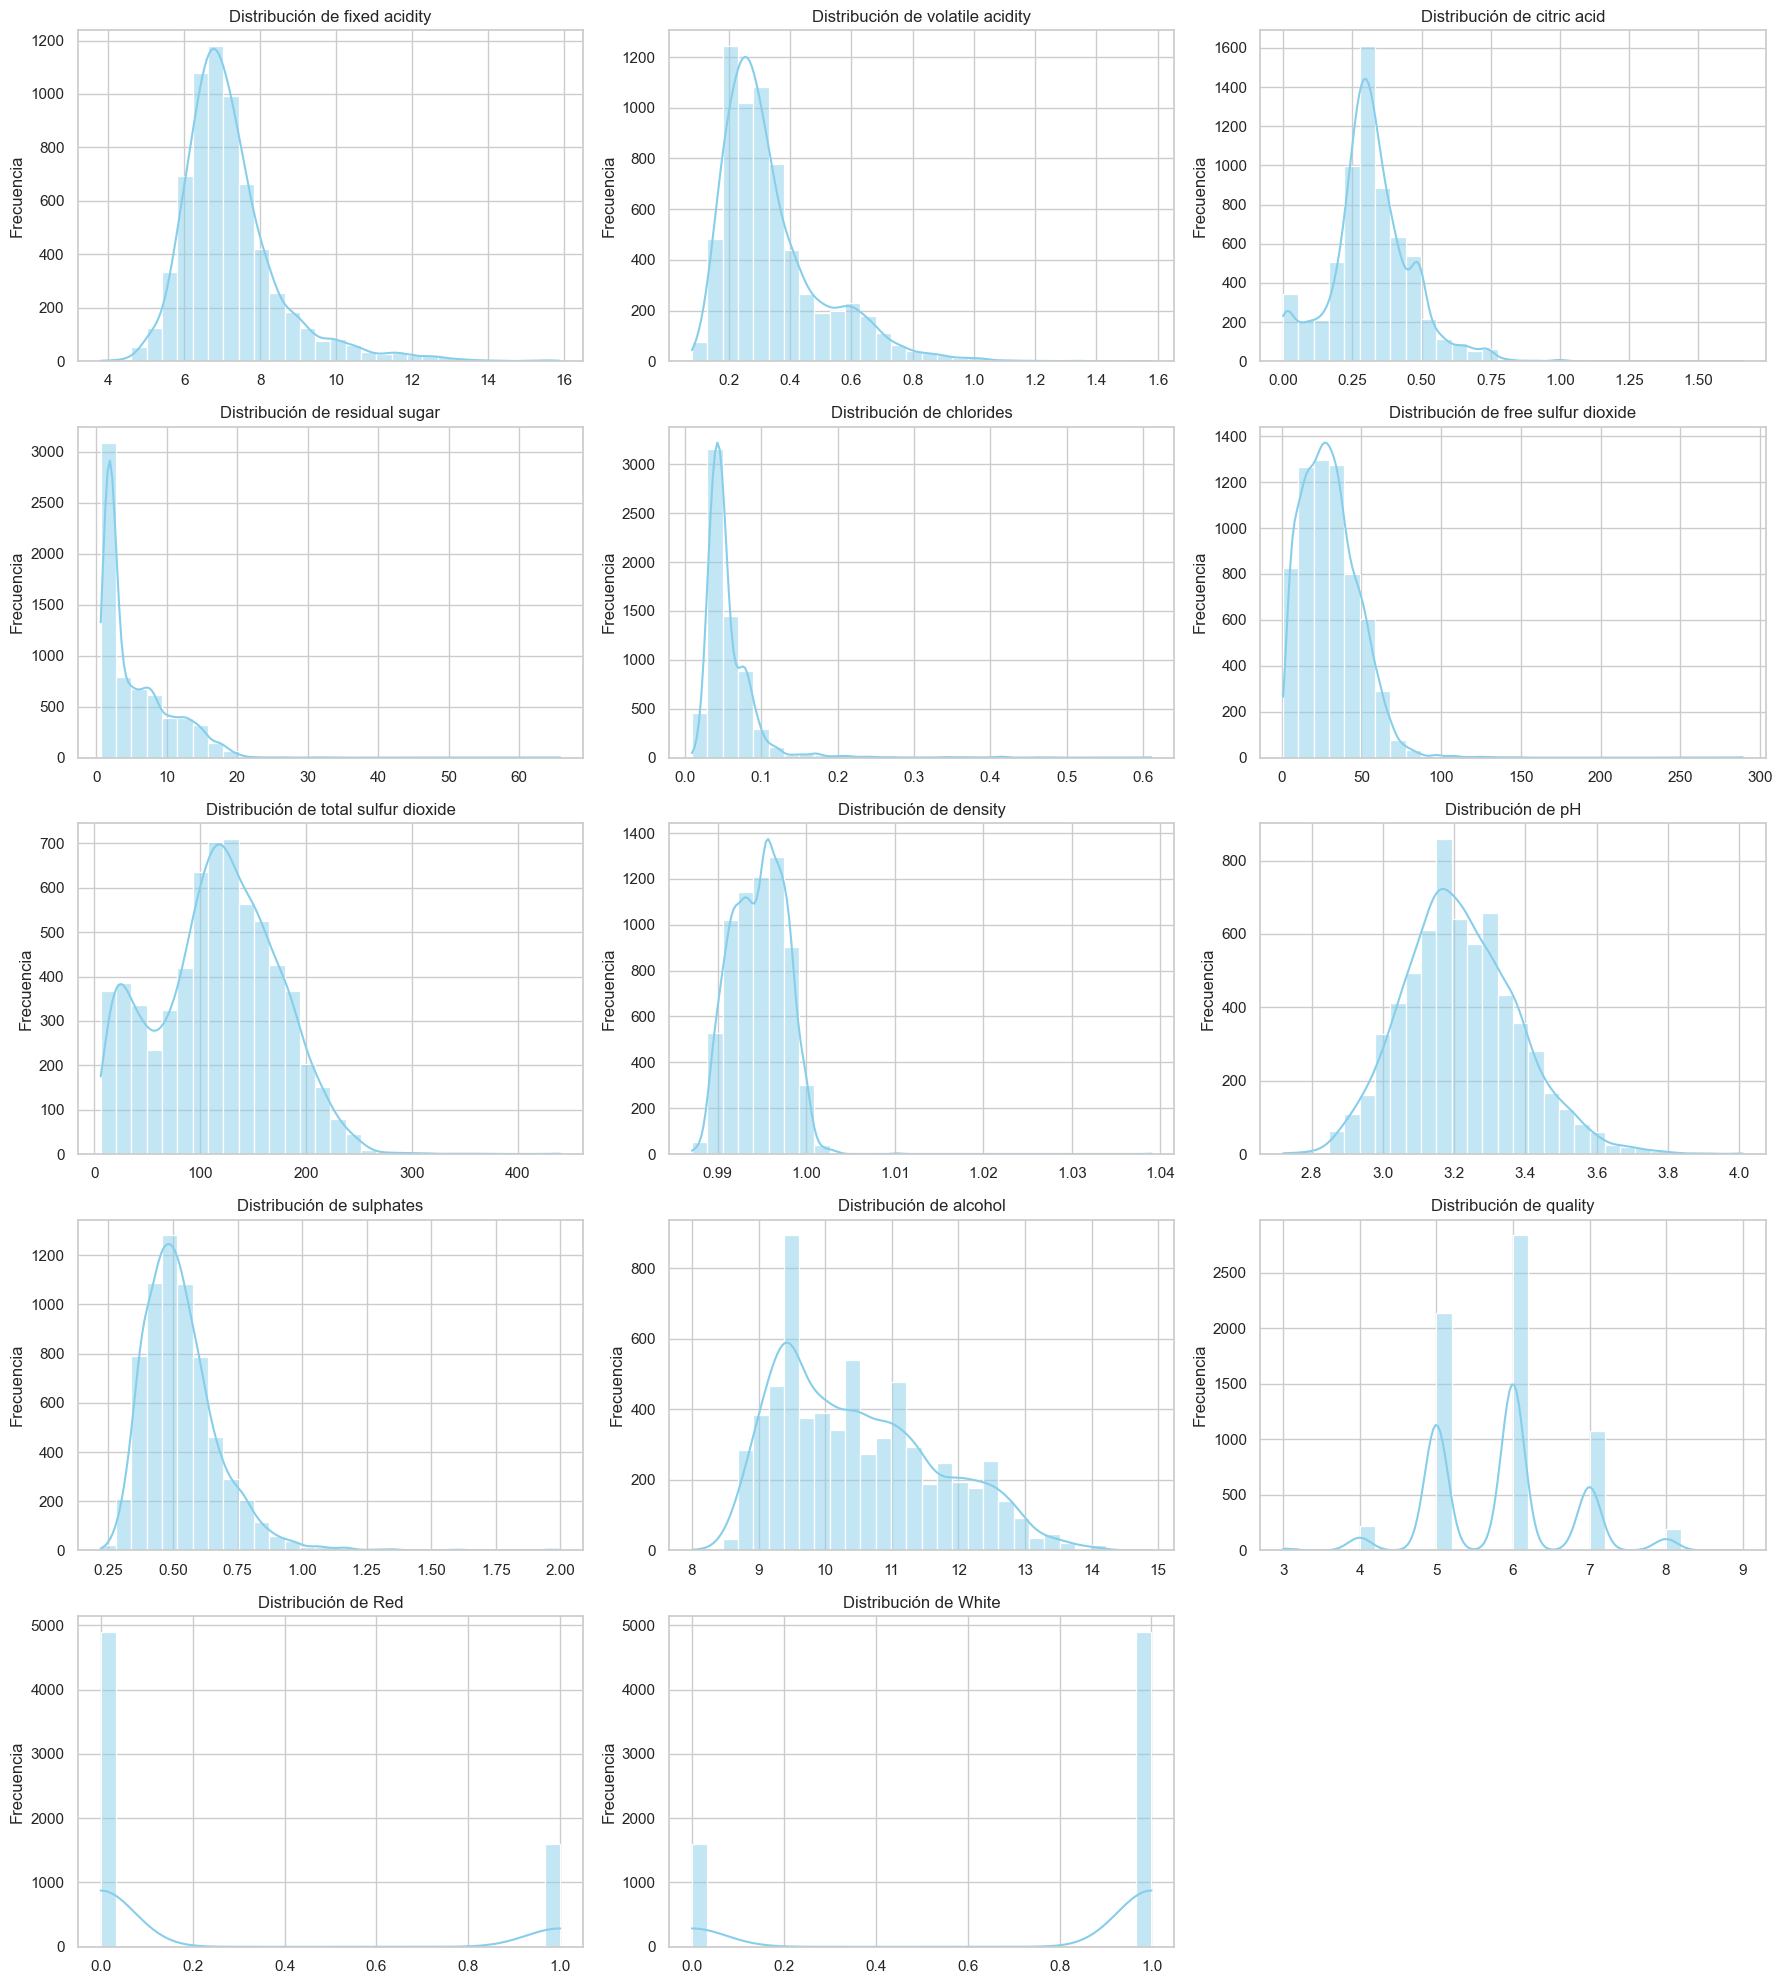

In [27]:
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Ajustes generales del estilo
sns.set(style="whitegrid")
plt.figure(figsize=(20, 25)) 

# Número de columnas y filas en la figura
n_cols = 3
n_rows = -(-len(numeric_features) // n_cols)  # redondeo hacia arriba

# Crear subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()  # Aplanamos para fácil indexación

for i, col in enumerate(numeric_features):
    sns.histplot(data[col], kde=True, ax=axes[i], bins=30, color='skyblue')
    axes[i].set_title(f'Distribución de {col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frecuencia')

# Eliminar ejes vacíos si sobran
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Mostrar graficos
plt.tight_layout()
plt.show()


### ¿De dónde viene?
> El dataset proviene del repositorio de *Machine Learning* de la [University of California Irvine (UCI)](https://archive.ics.uci.edu/dataset/186/wine+quality), y fue utilizado originalmente en la investigación de **Cortez et al. (2009)** titulada:  
> *"Modeling wine preferences by data mining from physicochemical properties"*.  
> [Enlace al paper](http://www3.dsi.uminho.pt/pcortez/wine/)  
>  
> Los datos corresponden a muestras de vino blanco y tinto de la región de **Vinho Verde**, en el norte de Portugal.  
> Debido a restricciones de privacidad y logística, solo se incluyen variables **físico-químicas** (inputs) y **sensoriales** (output), sin datos sobre tipo de uva, marca o precio.

---

### ¿Qué contiene?
> El dataset contiene dos archivos:  
> - `winequality-red.csv`: 1,599 muestras de vino tinto  
> - `winequality-white.csv`: 4,898 muestras de vino blanco  
>  
> Cada fila representa una muestra de vino con:  
> - 11 variables físico-químicas continuas (como acidez, alcohol, pH, etc.)  
> - 1 variable objetivo `quality` (entero de 0 a 10, según cata de expertos)  
> - 1 variable categórica derivada (`color`: Red o White) para identificar el tipo de vino

---

### ¿Qué información dan las muestras?
> Cada muestra representa un vino específico, evaluado en laboratorio.  
> Las variables físico-químicas son medidas numéricas como el nivel de azúcar, acidez, alcohol, etc.  
> La variable `quality` representa una **calificación sensorial** otorgada por expertos, y es el objetivo a predecir.  
>  
> Estas muestras permiten estudiar cómo las características químicas influyen en la percepción de calidad del vino.

---

### ¿Qué se quiere analizar?
> Se quiere predecir la variable `quality` usando modelos de **regresión**, considerando tanto vinos tintos como blancos.  
>  
> Se probarán 3 tipos de modelos:  
> - Regresión lineal (con Train/Test)  
> - Regresión polinomial de orden 2 con variables mas correlacionadas (con validación LOOCV)  
> - Regresión lineal con variables mas correlacionadas (con validación K-FOLD)  
>  
> Cada modelo se probará en 4 variantes:  
> - Sin regularización  
> - Ridge (L2)  
> - Lasso (L1)  
> - ElasticNet (combinación L1 + L2)

---

### ¿Qué variables se tienen que transformar para poder usarse en un modelo de regresión?
> Aunque todas las variables son continuas y no hay valores faltantes, sí se requieren transformaciones por motivos prácticos:  
> - Las variables tienen **escalas distintas** (por ejemplo, alcohol entre 8-14 y pH alrededor de 3)  
> - Modelos con regularización y polinomiales son sensibles a estas escalas  
>  
> Además:  
> - Las variables categóricas (`Red`, `White`) se pueden usar como dummies  
> - Las relaciones pueden ser no lineales, lo que motiva el uso de modelos polinomiales

---

### ¿Qué transformaciones se van a usar?
> 1. **Estandarización** para todas las variables numéricas:  
> 2. **Expansión polinomial** de segundo orden para capturar relaciones no lineales complejas  
> 3. **Regularización** con Ridge, Lasso y ElasticNet  
> 4. **Validación cruzada Leave-One-Out (LOOCV) y K-folds** para los modelos 2 y 3

---

### ¿Qué resultado se podría encontrar al realizar una regresión?
> #### a) Variables importantes esperadas:  
> - `alcohol`: se espera correlación **positiva** con la calidad  
> - `volatile acidity`: correlación **negativa**  
> - `sulphates`, `citric acid` y `density`: también pueden ser relevantes  
> Tambien se puede esperar que ninguna regresión pueda explicar la relacion entre mis datos y no poder predecir la variable de calidad 

<div style="background-color: #d4edda; padding: 15px; border-radius: 8px;">
  <h3> Modelo 1 - Regresión Lineal Multiple (todas las variables) (train / test split)</h3>
</div>


<div style="background-color: #d4edda; padding: 15px; border-radius: 8px;">
  <h3> Modelo 1 - Sin penalización</h3>
</div>


In [34]:
X = data.drop('quality', axis=1)
y = data['quality']

# Separar en train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Agregar constante para statsmodels
X_train_sm = sm.add_constant(X_train_scaled)

# Ajustar modelo OLS
model_ols = sm.OLS(y_train, X_train_sm).fit()

# Resumen con p-values
print(model_ols.summary())

# Predicciones en test
X_test_sm = sm.add_constant(X_test_scaled)
y_pred_ols = model_ols.predict(X_test_sm)

# Métricas en test
print("R² (test):", r2_score(y_test, y_pred_ols))
print("MSE (test):", mean_squared_error(y_test, y_pred_ols))

#Intercepto
intercept = model_ols.params[0]

# Coeficientes (en orden de las columnas escaladas)
coeficients = model_ols.params[1:]

# Nombre de las variables predictoras
features = X.columns

# Mostrar intercepto y coeficientes juntos
print(f"Intercepto: {intercept:.4f}")
print("Coeficientes:")
for feature, coef in zip(features, coeficients):
    print(f"  {feature}: {coef:.4f}")

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     187.7
Date:                Sun, 28 Sep 2025   Prob (F-statistic):               0.00
Time:                        19:46:19   Log-Likelihood:                -5751.8
No. Observations:                5197   AIC:                         1.153e+04
Df Residuals:                    5184   BIC:                         1.161e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8145      0.010    572.043      0.0

$$
\begin{aligned}
\text{quality} =\ &5.8145 + 0.1187 \times x_{\text{fixed acidity}} - 0.2447 \times x_{\text{volatile acidity}} - 0.0142 \times x_{\text{citric acid}} \\
&+ 0.3013 \times x_{\text{residual sugar}} - 0.0203 \times x_{\text{chlorides}} + 0.1042 \times x_{\text{free sulfur dioxide}} \\
&- 0.0916 \times x_{\text{total sulfur dioxide}} - 0.3071 \times x_{\text{density}} + 0.0842 \times x_{\text{pH}} \\
&+ 0.1134 \times x_{\text{sulphates}} + 0.2771 \times x_{\text{alcohol}} + 0.0718 \times x_{\text{Red}} - 0.0718 \times x_{\text{W}}
\end{aligned}
$$

<div style="background-color: #d4edda; padding: 15px; border-radius: 8px;">
  <h3> Modelo 1 - Ridge</h3>
</div>


In [38]:
# Crear modelo Ridge
ridge_model = Ridge(alpha=1.0, random_state=42)  # alpha=1.0 es un valor estándar
ridge_model.fit(X_train_scaled, y_train)

# Predicciones en test
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Métricas
print("Ridge Regression:")
print("R² (test):", r2_score(y_test, y_pred_ridge))
print("MSE (test):", mean_squared_error(y_test, y_pred_ridge))
print("MAE (test):", mean_absolute_error(y_test, y_pred_ridge))

# Intercepto y coeficientes
print(f"Intercepto: {ridge_model.intercept_:.4f}")
print("Coeficientes:")
for feature, coef in zip(X.columns, ridge_model.coef_):
    print(f"  {feature}: {coef:.4f}")


Ridge Regression:
R² (test): 0.2671765571524508
MSE (test): 0.5412243687866932
MAE (test): 0.5644160731283614
Intercepto: 5.8145
Coeficientes:
  fixed acidity: 0.1180
  volatile acidity: -0.2446
  citric acid: -0.0141
  residual sugar: 0.3001
  chlorides: -0.0204
  free sulfur dioxide: 0.1043
  total sulfur dioxide: -0.0917
  density: -0.3053
  pH: 0.0838
  sulphates: 0.1133
  alcohol: 0.2777
  Red: 0.0715
  White: -0.0715


$$
\begin{aligned}
\hat{\text{quality}} =\ &5.8145 + 0.1180 \times x_{\text{fixed acidity}} - 0.2446 \times x_{\text{volatile acidity}} - 0.0141 \times x_{\text{citric acid}} \\
&+ 0.3001 \times x_{\text{residual sugar}} - 0.0204 \times x_{\text{chlorides}} + 0.1043 \times x_{\text{free sulfur dioxide}} \\
&- 0.0917 \times x_{\text{total sulfur dioxide}} - 0.3053 \times x_{\text{density}} + 0.0838 \times x_{\text{pH}} \\
&+ 0.1133 \times x_{\text{sulphates}} + 0.2777 \times x_{\text{alcohol}} + 0.0715 \times x_{\text{Red}} - 0.0715 \times x_{\text{White}}
\end{aligned}
$$

<div style="background-color: #d4edda; padding: 15px; border-radius: 8px;">
  <h3> Modelo 1 - Lasso</h3>
</div>


In [42]:
# Crear modelo Lasso
lasso_model = Lasso(alpha=0.1, random_state=42, max_iter=10000)  # alpha es penalización, puedes ajustar

lasso_model.fit(X_train_scaled, y_train)

# Predicciones en test
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Métricas
print("Lasso Regression:")
print("R² (test):", r2_score(y_test, y_pred_lasso))
print("MSE (test):", mean_squared_error(y_test, y_pred_lasso))
print("MAE (test):", mean_absolute_error(y_test, y_pred_lasso))

# Intercepto y coeficientes
print(f"Intercepto: {lasso_model.intercept_:.4f}")
print("Coeficientes:")
for feature, coef in zip(X.columns, lasso_model.coef_):
    print(f"  {feature}: {coef:.4f}")


Lasso Regression:
R² (test): 0.2311651534712229
MSE (test): 0.5678204737785881
MAE (test): 0.5915902656076012
Intercepto: 5.8145
Coeficientes:
  fixed acidity: -0.0000
  volatile acidity: -0.1195
  citric acid: 0.0000
  residual sugar: 0.0000
  chlorides: -0.0000
  free sulfur dioxide: 0.0000
  total sulfur dioxide: -0.0000
  density: -0.0000
  pH: 0.0000
  sulphates: 0.0000
  alcohol: 0.2885
  Red: -0.0000
  White: 0.0000


$$
\hat{\text{quality}} = 5.8145 - 0.1195 \times x_{\text{volatile acidity}} + 0.2885 \times x_{\text{alcohol}}
$$

<div style="background-color: #d4edda; padding: 15px; border-radius: 8px;">
  <h3> Modelo 1 - ElasticNet</h3>
</div>


In [46]:
# Crear modelo ElasticNet
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42, max_iter=10000)  
# alpha = penalización, l1_ratio = mezcla entre Lasso (1) y Ridge (0)

elasticnet_model.fit(X_train_scaled, y_train)

# Predicciones en test
y_pred_enet = elasticnet_model.predict(X_test_scaled)

# Métricas
print("ElasticNet Regression:")
print("R² (test):", r2_score(y_test, y_pred_enet))
print("MSE (test):", mean_squared_error(y_test, y_pred_enet))
print("MAE (test):", mean_absolute_error(y_test, y_pred_enet))

# Intercepto y coeficientes
print(f"Intercepto: {elasticnet_model.intercept_:.4f}")
print("Coeficientes:")
for feature, coef in zip(X.columns, elasticnet_model.coef_):
    print(f"  {feature}: {coef:.4f}")


ElasticNet Regression:
R² (test): 0.24962112122974345
MSE (test): 0.5541898788543331
MAE (test): 0.5823056333916091
Intercepto: 5.8145
Coeficientes:
  fixed acidity: 0.0000
  volatile acidity: -0.1633
  citric acid: 0.0000
  residual sugar: 0.0034
  chlorides: -0.0000
  free sulfur dioxide: 0.0074
  total sulfur dioxide: -0.0000
  density: -0.0000
  pH: 0.0000
  sulphates: 0.0289
  alcohol: 0.3232
  Red: 0.0000
  White: -0.0000


$$
\hat{\text{quality}} = 5.8145 - 0.1633 \times x_{\text{volatile acidity}} + 0.0034 \times x_{\text{residual sugar}} + 0.0074 \times x_{\text{free sulfur dioxide}} + 0.0289 \times x_{\text{sulphates}} + 0.3232 \times x_{\text{alcohol}}
$$

<div style="background-color: #e6ccff; padding: 15px; border-radius: 8px;">
  <h3> Modelo 2 - Regresión Polinomial grado 2 (variables mas correlacionadas) (LOOCV)</h3>
</div>


In [50]:
correlations = data.corr()['quality'].abs().sort_values(ascending=False)
print(correlations)


quality                 1.000000
alcohol                 0.444319
density                 0.305858
volatile acidity        0.265699
chlorides               0.200666
Red                     0.119323
White                   0.119323
citric acid             0.085532
fixed acidity           0.076743
free sulfur dioxide     0.055463
total sulfur dioxide    0.041385
sulphates               0.038485
residual sugar          0.036980
pH                      0.019506
Name: quality, dtype: float64


<div style="background-color: #e6ccff; padding: 15px; border-radius: 8px;">
  <h3> Modelo 2 - Sin penalización</h3>
</div>


In [53]:
# Variables predictoras y target
selected_cols = ['alcohol', 'density', 'volatile acidity', 'chlorides', 'Red']
X_selected = data[selected_cols]
y = data['quality']

# Crear términos cuadrados sin interacciones
X_linear = X_selected.copy()
X_squared = X_linear ** 2
X_squared.columns = [col + '^2' for col in X_linear.columns]

# Concatenar variables originales + términos cuadrados
X_poly_simple = pd.concat([X_linear, X_squared], axis=1)

# Escalar
scaler = StandardScaler()
X_poly_simple_scaled = scaler.fit_transform(X_poly_simple)

# Ajustar modelo completo con statsmodels para obtener p-values
X_poly_sm = sm.add_constant(X_poly_simple_scaled)
model_poly_ols = sm.OLS(y, X_poly_sm).fit()
print("Resumen OLS con términos lineales y cuadrados (sin interacciones):")
print(model_poly_ols.summary())

# Evaluar modelo con LOOCV (sin penalización)
loo = LeaveOneOut()
y_true, y_pred = [], []
model_lr = LinearRegression()

for train_index, test_index in loo.split(X_poly_simple_scaled):
    X_train, X_test = X_poly_simple_scaled[train_index], X_poly_simple_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model_lr.fit(X_train, y_train)
    y_pred.append(model_lr.predict(X_test)[0])
    y_true.append(y_test.values[0])

print("\nEvaluación LOOCV:")
print("R²:", r2_score(y_true, y_pred))
print("MSE:", mean_squared_error(y_true, y_pred))
print("MAE:", mean_absolute_error(y_true, y_pred))


Resumen OLS con términos lineales y cuadrados (sin interacciones):
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     274.4
Date:                Sun, 28 Sep 2025   Prob (F-statistic):               0.00
Time:                        19:50:11   Log-Likelihood:                -7289.9
No. Observations:                6497   AIC:                         1.460e+04
Df Residuals:                    6487   BIC:                         1.467e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

$$
\begin{aligned}
\hat{quality} =\ & 5.8184 \\
& - 0.5500 \times \text{alcohol} \\
& - 0.6471 \times \text{density} \\
& - 0.4190 \times \text{volatile acidity} \\
& - 0.0726 \times \text{chlorides} \\
& + 0.0501 \times \text{Red} \\
& + 0.9746 \times (\text{alcohol})^2 \\
& + 0.7270 \times (\text{density})^2 \\
& + 0.1387 \times (\text{volatile acidity})^2 \\
& + 0.0406 \times (\text{chlorides})^2 \\
& + 0.0501 \times (\text{Red})^2
\end{aligned}
$$

<div style="background-color: #e6ccff; padding: 15px; border-radius: 8px;">
  <h3> Modelo 2 - Ridge</h3>
</div>


In [57]:
# Seleccionar variables importantes
selected_cols = ['alcohol', 'density', 'volatile acidity', 'chlorides', 'Red']
X_selected = data[selected_cols]
y = data['quality']

# Generar variables cuadráticas
X_squared = X_selected ** 2
X_squared.columns = [col + '^2' for col in X_selected.columns]

# Concatenar originales + cuadráticas
X_poly = pd.concat([X_selected, X_squared], axis=1)

# Escalar
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# Ridge con LOOCV
ridge = Ridge(alpha=1.0)
loo = LeaveOneOut()

y_true_ridge, y_pred_ridge = [], []

for train_idx, test_idx in loo.split(X_poly_scaled):
    X_train, X_test = X_poly_scaled[train_idx], X_poly_scaled[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    ridge.fit(X_train, y_train)
    y_pred_ridge.append(ridge.predict(X_test)[0])
    y_true_ridge.append(y_test)

# Evaluación
print("Ridge Regression (LOOCV)")
print("R²:", r2_score(y_true_ridge, y_pred_ridge))
print("MSE:", mean_squared_error(y_true_ridge, y_pred_ridge))
print("MAE:", mean_absolute_error(y_true_ridge, y_pred_ridge))

# Coeficientes
ridge.fit(X_poly_scaled, y)
print("\nIntercepto:", ridge.intercept_)
print("Coeficientes:")
for feature, coef in zip(X_poly.columns, ridge.coef_):
    print(f"  {feature}: {coef:.4f}")

Ridge Regression (LOOCV)
R²: 0.27317344894687945
MSE: 0.5541742793791671
MAE: 0.5801084479175935

Intercepto: 5.81837771279052
Coeficientes:
  alcohol: -0.4851
  density: 0.0030
  volatile acidity: -0.4158
  chlorides: -0.0723
  Red: 0.0489
  alcohol^2: 0.9117
  density^2: 0.0791
  volatile acidity^2: 0.1364
  chlorides^2: 0.0406
  Red^2: 0.0489


$$
\begin{aligned}
\hat{quality} =\ & 5.8184 \\
& - 0.4851 \cdot \text{alcohol} \\
& + 0.0030 \cdot \text{density} \\
& - 0.4158 \cdot \text{volatile\_acidity} \\
& - 0.0723 \cdot \text{chlorides} \\
& + 0.0489 \cdot \text{Red} \\
& + 0.9117 \cdot (\text{alcohol})^2 \\
& + 0.0791 \cdot (\text{density})^2 \\
& + 0.1364 \cdot (\text{volatile\_acidity})^2 \\
& + 0.0406 \cdot (\text{chlorides})^2 \\
& + 0.0489 \cdot (\text{Red})^2
\end{aligned}
$$

<div style="background-color: #e6ccff; padding: 15px; border-radius: 8px;">
  <h3> Modelo 2 - Lasso</h3>
</div>


In [78]:
# Seleccionar variables importantes
selected_cols = ['alcohol', 'density', 'volatile acidity', 'chlorides', 'Red']
X_selected = data[selected_cols]
y = data['quality']

# Generar variables cuadráticas
X_squared = X_selected ** 2
X_squared.columns = [col + '^2' for col in X_selected.columns]

# Concatenar originales + cuadráticas
X_poly = pd.concat([X_selected, X_squared], axis=1)

# Escalar
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# Lasso con LOOCV
lasso = Lasso(alpha=1.0, max_iter=10000)
loo = LeaveOneOut()

y_true_lasso, y_pred_lasso = [], []

for train_idx, test_idx in loo.split(X_poly_scaled):
    X_train, X_test = X_poly_scaled[train_idx], X_poly_scaled[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    lasso.fit(X_train, y_train)
    y_pred_lasso.append(lasso.predict(X_test)[0])
    y_true_lasso.append(y_test)

# Evaluación
print("Lasso Regression (LOOCV)")
print("R²:", r2_score(y_true_lasso, y_pred_lasso))
print("MSE:", mean_squared_error(y_true_lasso, y_pred_lasso))
print("MAE:", mean_absolute_error(y_true_lasso, y_pred_lasso))

# Coeficientes
lasso.fit(X_poly_scaled, y)
print("\nIntercepto:", lasso.intercept_)
print("Coeficientes:")
for feature, coef in zip(X_poly.columns, lasso.coef_):
    print(f"  {feature}: {coef:.4f}")


Lasso Regression (LOOCV)
R²: -0.0003079054711958573
MSE: 0.7626921606930528
MAE: 0.6856565478117604

Intercepto: 5.818377712790519
Coeficientes:
  alcohol: 0.0000
  density: -0.0000
  volatile acidity: -0.0000
  chlorides: -0.0000
  Red: -0.0000
  alcohol^2: 0.0000
  density^2: -0.0000
  volatile acidity^2: -0.0000
  chlorides^2: -0.0000
  Red^2: -0.0000


$$
\hat{quality} = 5.8184
$$

<div style="background-color: #e6ccff; padding: 15px; border-radius: 8px;">
  <h3> Modelo 2 - ElasticNet</h3>
</div>


In [63]:
# Seleccionar variables importantes
selected_cols = ['alcohol', 'density', 'volatile acidity', 'chlorides', 'Red']
X_selected = data[selected_cols]
y = data['quality']

# Generar variables cuadráticas
X_squared = X_selected ** 2
X_squared.columns = [col + '^2' for col in X_selected.columns]

# Concatenar originales + cuadráticas
X_poly = pd.concat([X_selected, X_squared], axis=1)

# Escalar
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)


# ElasticNet con LOOCV
elastic = ElasticNet(alpha=1.0, l1_ratio=0.5, max_iter=10000)
loo = LeaveOneOut()

y_true_elastic, y_pred_elastic = [], []

for train_idx, test_idx in loo.split(X_poly_scaled):
    X_train, X_test = X_poly_scaled[train_idx], X_poly_scaled[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    elastic.fit(X_train, y_train)
    y_pred_elastic.append(elastic.predict(X_test)[0])
    y_true_elastic.append(y_test)

# Evaluación
print("ElasticNet Regression (LOOCV)")
print("R²:", r2_score(y_true_elastic, y_pred_elastic))
print("MSE:", mean_squared_error(y_true_elastic, y_pred_elastic))
print("MAE:", mean_absolute_error(y_true_elastic, y_pred_elastic))

# Coeficientes
elastic.fit(X_poly_scaled, y)
print("\nIntercepto:", elastic.intercept_)
print("Coeficientes:")
for feature, coef in zip(X_poly.columns, elastic.coef_):
    print(f"  {feature}: {coef:.4f}")


ElasticNet Regression (LOOCV)
R²: -0.0003079054711958573
MSE: 0.7626921606930528
MAE: 0.6856565478117604

Intercepto: 5.818377712790519
Coeficientes:
  alcohol: 0.0000
  density: -0.0000
  volatile acidity: -0.0000
  chlorides: -0.0000
  Red: -0.0000
  alcohol^2: 0.0000
  density^2: -0.0000
  volatile acidity^2: -0.0000
  chlorides^2: -0.0000
  Red^2: -0.0000


$$
\hat{quality} = 5.8184
$$

<div style="background-color: #fff3cd; padding: 15px; border-radius: 8px;">
  <h3> Modelo 3 - Regresión Lineal Multiple (variables mas correlacionadas) (K-FOLDS)</h3>
</div>


<div style="background-color: #fff3cd; padding: 15px; border-radius: 8px;">
  <h3> Modelo 3 - Sin penalización</h3>
</div>


In [69]:
# Variables seleccionadas
selected_cols = ['alcohol', 'density', 'volatile acidity', 'chlorides', 'Red']
X = data[selected_cols]
y = data['quality']

# Escalar variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Añadir constante para statsmodels
X_sm = sm.add_constant(X_scaled)

# Ajustar modelo OLS para obtener p-values
model_ols = sm.OLS(y, X_sm).fit()
print(model_ols.summary())

kf = KFold(n_splits=5, shuffle=True, random_state=42)

y_true, y_pred = [], []
model_lr = LinearRegression()

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model_lr.fit(X_train, y_train)
    y_pred_fold = model_lr.predict(X_test)
    
    y_true.extend(y_test)
    y_pred.extend(y_pred_fold)

# Métricas globales
print("R²:", r2_score(y_true, y_pred))
print("MSE:", mean_squared_error(y_true, y_pred))
print("MAE:", mean_absolute_error(y_true, y_pred))

# Intercepto y coeficientes finales (entrenados en todo el dataset)
model_lr.fit(X_scaled, y)
print("\nIntercepto:", model_lr.intercept_)
print("Coeficientes:")
for col, coef in zip(selected_cols, model_lr.coef_):
    print(f"  {col}: {coef:.4f}")

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     480.1
Date:                Sun, 28 Sep 2025   Prob (F-statistic):               0.00
Time:                        19:53:03   Log-Likelihood:                -7315.5
No. Observations:                6497   AIC:                         1.464e+04
Df Residuals:                    6491   BIC:                         1.468e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8184      0.009    628.327      0.0

$$
\hat{quality} = 5.8184 + 0.4331 \times \text{alcohol} + 0.0879 \times \text{density} - 0.2741 \times \text{volatile acidity} - 0.0278 \times \text{chlorides} + 0.0691 \times \text{Red}
$$

<div style="background-color: #fff3cd; padding: 15px; border-radius: 8px;">
  <h3> Modelo 3 - Ridge</h3>
</div>


In [83]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# 1. Variables
selected_cols = ['alcohol', 'density', 'volatile acidity', 'chlorides', 'Red']
X = data[selected_cols].values
y = data['quality'].values

# 2. Escalar X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. KFold CV
kf = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = []
mse_scores = []
mae_scores = []

coefs = []
intercepts = []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model_ridge = Ridge(alpha=1.0)  # Puedes ajustar alpha si quieres
    model_ridge.fit(X_train, y_train)
    
    y_pred = model_ridge.predict(X_test)
    
    r2_scores.append(r2_score(y_test, y_pred))
    mse_scores.append(mean_squared_error(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    
    coefs.append(model_ridge.coef_)
    intercepts.append(model_ridge.intercept_)

# Promedios métricas
print("Ridge Regression K-Fold CV:")
print(f"Mean R²: {np.mean(r2_scores):.4f}")
print(f"Mean MSE: {np.mean(mse_scores):.4f}")
print(f"Mean MAE: {np.mean(mae_scores):.4f}")

# Coeficientes promedio
coef_mean = np.mean(coefs, axis=0)
intercept_mean = np.mean(intercepts)

print("\nIntercepto promedio:", intercept_mean)
print("Coeficientes promedio:")
for name, coef in zip(selected_cols, coef_mean):
    print(f"  {name}: {coef:.4f}")

Ridge Regression K-Fold CV:
Mean R²: 0.2686
Mean MSE: 0.5574
Mean MAE: 0.5820

Intercepto promedio: 5.818376084671877
Coeficientes promedio:
  alcohol: 0.4328
  density: 0.0875
  volatile acidity: -0.2741
  chlorides: -0.0279
  Red: 0.0690


$$
\hat{quality} = 5.8184 + 0.4328 \cdot \text{alcohol} + 0.0875 \cdot \text{density} - 0.2741 \cdot \text{volatile acidity} - 0.0279 \cdot \text{chlorides} + 0.0690 \cdot \text{Red}
$$

<div style="background-color: #fff3cd; padding: 15px; border-radius: 8px;">
  <h3> Modelo 3 - Lasso</h3>
</div>


In [88]:
r2_scores = []
mse_scores = []
mae_scores = []

coefs = []
intercepts = []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model_lasso = Lasso(alpha=0.01, max_iter=10000)  # Ajusta alpha si quieres
    model_lasso.fit(X_train, y_train)
    
    y_pred = model_lasso.predict(X_test)
    
    r2_scores.append(r2_score(y_test, y_pred))
    mse_scores.append(mean_squared_error(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    
    coefs.append(model_lasso.coef_)
    intercepts.append(model_lasso.intercept_)

print("Lasso Regression K-Fold CV:")
print(f"Mean R²: {np.mean(r2_scores):.4f}")
print(f"Mean MSE: {np.mean(mse_scores):.4f}")
print(f"Mean MAE: {np.mean(mae_scores):.4f}")

coef_mean = np.mean(coefs, axis=0)
intercept_mean = np.mean(intercepts)

print("\nIntercepto promedio:", intercept_mean)
print("Coeficientes promedio:")
for name, coef in zip(selected_cols, coef_mean):
    print(f"  {name}: {coef:.4f}")


Lasso Regression K-Fold CV:
Mean R²: 0.2668
Mean MSE: 0.5588
Mean MAE: 0.5836

Intercepto promedio: 5.818384880185137
Coeficientes promedio:
  alcohol: 0.4044
  density: 0.0539
  volatile acidity: -0.2465
  chlorides: -0.0107
  Red: 0.0444


$$
\hat{quality} = 5.8184 + 0.4044 \cdot \text{alcohol} + 0.0539 \cdot \text{density} - 0.2465 \cdot \text{volatile acidity} - 0.0107 \cdot \text{chlorides} + 0.0444 \cdot \text{Red}
$$

<div style="background-color: #fff3cd; padding: 15px; border-radius: 8px;">
  <h3> Modelo 3 - ElasticNet</h3>
</div>


In [92]:
r2_scores = []
mse_scores = []
mae_scores = []

coefs = []
intercepts = []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model_enet = ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=10000)  # Ajusta alpha y l1_ratio si quieres
    model_enet.fit(X_train, y_train)
    
    y_pred = model_enet.predict(X_test)
    
    r2_scores.append(r2_score(y_test, y_pred))
    mse_scores.append(mean_squared_error(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    
    coefs.append(model_enet.coef_)
    intercepts.append(model_enet.intercept_)

print("ElasticNet Regression K-Fold CV:")
print(f"Mean R²: {np.mean(r2_scores):.4f}")
print(f"Mean MSE: {np.mean(mse_scores):.4f}")
print(f"Mean MAE: {np.mean(mae_scores):.4f}")

coef_mean = np.mean(coefs, axis=0)
intercept_mean = np.mean(intercepts)

print("\nIntercepto promedio:", intercept_mean)
print("Coeficientes promedio:")
for name, coef in zip(selected_cols, coef_mean):
    print(f"  {name}: {coef:.4f}")


ElasticNet Regression K-Fold CV:
Mean R²: 0.2680
Mean MSE: 0.5579
Mean MAE: 0.5828

Intercepto promedio: 5.81838019469777
Coeficientes promedio:
  alcohol: 0.4137
  density: 0.0666
  volatile acidity: -0.2577
  chlorides: -0.0198
  Red: 0.0565


$$
\hat{quality} = 5.8184 + 0.4137 \cdot \text{alcohol} + 0.0666 \cdot \text{density} - 0.2577 \cdot \text{volatile acidity} - 0.0198 \cdot \text{chlorides} + 0.0565 \cdot \text{Red}
$$

<div style="background-color: #cce5ff; padding: 15px; border-radius: 8px;">
  <h3> Pipeline</h3>
</div>


![Mi pipeline](pipeline.jpg)

<div style="background-color: #cce5ff; padding: 15px; border-radius: 8px;">
  <h3> Ajuste de modelos con comparación R²</h3>
</div>


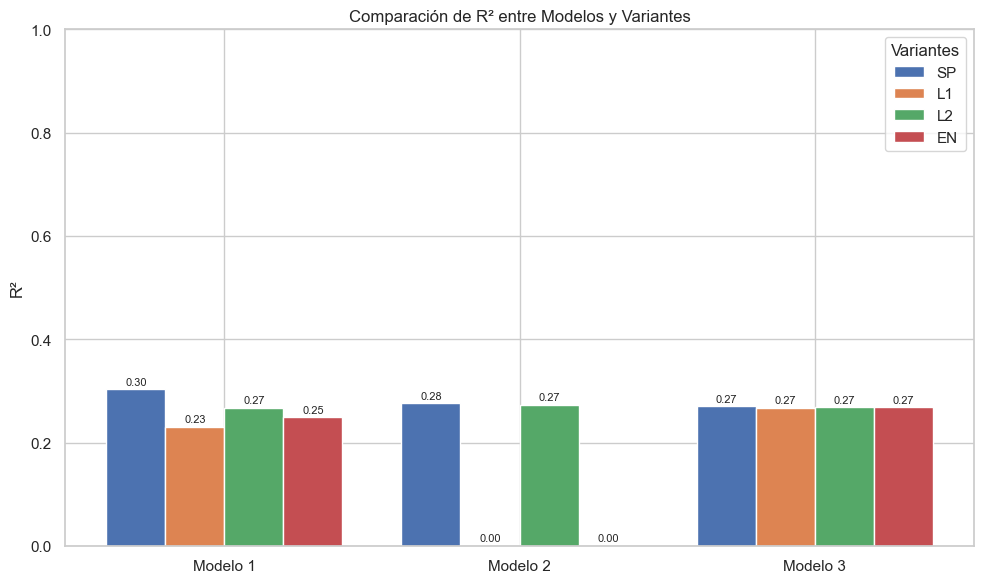

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# Nombres de los modelos y variantes
modelos = ['Modelo 1', 'Modelo 2', 'Modelo 3']
variantes = ['SP', 'L1', 'L2', 'EN']

# Valores de R² para cada modelo y variante
r2_values = [
    [0.303, 0.23,  0.267, 0.249],   # Modelo 1
    [0.276, 0.0,   0.273, 0.0],     # Modelo 2
    [0.270, 0.2668, 0.268, 0.268]   # Modelo 3
]

# Parámetros para la gráfica
x = np.arange(len(modelos))  # posiciones para cada modelo
width = 0.2  # ancho de cada barra

# Crear figura
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar cada variante con desplazamiento
for i in range(len(variantes)):
    r2_variant = [r2[i] for r2 in r2_values]
    ax.bar(x + i*width - 1.5*width, r2_variant, width, label=variantes[i])

# Etiquetas y formato
ax.set_ylabel('R²')
ax.set_title('Comparación de R² entre Modelos y Variantes')
ax.set_xticks(x)
ax.set_xticklabels(modelos)
ax.legend(title='Variantes')
ax.set_ylim(0, 1)

# Mostrar valores sobre las barras 
for i in range(len(variantes)):
    for j, val in enumerate([r2[i] for r2 in r2_values]):
        ax.text(j + i*width - 1.5*width, val + 0.005, f"{val:.2f}", ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


<div style="background-color: #cce5ff; padding: 15px; border-radius: 8px;">
  <h3> Análisis de significancia de factores (modelo sin penalización)</h3>
</div>


>**Modelo 1:**
Algunas variables muestran p-values muy bajos (p < 0.05), lo que indica que son estadísticamente significativas para explicar la variable respuesta (quality en este caso).
>Entre ellas destacan alcohol, sulphates y volatile acidity, que suelen ser determinantes en la calidad del vino.
>En contraste, variables como residual sugar o chlorides no alcanzan significancia estadística, lo que sugiere que su efecto sobre la calidad es menos relevante o está capturado por otras variables. 


>**Modelo 2:**
Al introducir términos polinomiales, aumentan las interacciones y aparecen nuevas variables significativas.
>Se confirma la importancia de alcohol y volatile acidity, pero también emergen efectos no lineales (cuadráticos) que capturan mejor la relación con la >calidad.
>Sin embargo, algunos coeficientes pierden significancia, lo que refleja cierta redundancia o colinealidad.


>**Modelo 3:**
El análisis de p-values mantiene un patrón similar: alcohol y sulphates siguen siendo significativos, mientras que otras variables se mantienen sin efecto estadístico claro.
>La validación cruzada ayuda a confirmar que los factores realmente significativos son consistentes a lo largo de distintas particiones de los datos.

<div style="background-color: #cce5ff; padding: 15px; border-radius: 8px;">
  <h3> Conclusión</h3>
</div>


Este trabajo tuvo como objetivo desarrollar, comparar y validar un conjunto de modelos de regresión para explicar y predecir la calidad del vino a partir de sus características químicas. A través del análisis exploratorio, se identificaron variables con mayor potencial explicativo, como alcohol, sulphates y volatile acidity, mientras que otras, como residual sugar y chlorides, mostraron baja relevancia estadística.

Se estimaron tres modelos:

- Modelo 1: regresión lineal con todas las variables,

- Modelo 2: regresión polinomial de segundo grado reducido con las variables mas correlacionadas,

- Modelo 3: regresión lineal reducido con las variables más correlacionadas.

Estos se evaluaron utilizando distintos enfoques de validación (train/test split, K-Folds, LOOCV) y regularizaciones (OLS, Ridge, Lasso, ElasticNet).

Sin embargo, los resultados obtenidos muestran que los modelos tienen un bajo poder predictivo, con valores de R² inferiores al 0.31 en todos los casos, incluso al aplicar regularización o introducir no linealidades. Esto indica que, si bien se lograron identificar algunos determinantes importantes de la calidad del vino notablemente, alcohol y volatile acidity, cuyos coeficientes fueron consistentes y estadísticamente significativos, la capacidad de los modelos para predecir con precisión es limitada.

Estos resultados sugieren que la calidad del vino no puede explicarse completamente mediante las variables químicas disponibles en este conjunto de datos, o que podrían existir factores sensoriales, de elaboración o de interacción compleja no considerados en el modelo. En este sentido, aunque se cumplieron los objetivos de análisis, modelado e interpretación, los modelos construidos no son adecuados como herramientas predictivas robustas, aunque sí ofrecen una base para comprender qué componentes químicos tienden a influir en la calidad del vino

<div style="background-color: #cce5ff; padding: 15px; border-radius: 8px;">
  <h3> Referencias</h3>
</div>


- Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J. (2009). Wine quality [Data set]. UCI Machine Learning Repository. https://archive.ics.uci.edu/dataset/186/wine+quality